In [1]:
from concurrent.futures import ThreadPoolExecutor
with ThreadPoolExecutor(max_workers=8) as executor:
    import numpy as np
    import requests
    import pandas as pd
    import matplotlib.pyplot as plt
    from sklearn.preprocessing import StandardScaler
    from datetime import datetime
    import warnings
    import yfinance as yf
    from sklearn.model_selection import train_test_split
    from ta import momentum
    from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
    from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score, mean_absolute_percentage_error
    import scipy.stats as stats
    from scipy.interpolate import interp1d
    import math
    from scipy.ndimage import gaussian_filter1d
    from sklearn.preprocessing import StandardScaler
    from sklearn.model_selection import GridSearchCV
    from sklearn.ensemble import GradientBoostingRegressor
    import statsmodels.api as sm
    import itertools
    import pip
    import joblib
    import time
    from sklearn.inspection import permutation_importance
    from sklearn.inspection import permutation_importance
    from sklearn.decomposition import PCA
    from sklearn.ensemble import IsolationForest
#Define main function
def main_function_input(symbol, symbol2):
    warnings.simplefilter(action='ignore', category=FutureWarning)
#Get hourly data for Bitcoin from yfinance
    def get_actual_data(symbol):
        return yf.download(symbol, period='730d', interval='1h')
#Set up bybit api request
    def fetch_trade_data(endpoint, params):
        response = requests.get(endpoint, params=params)
        if response.status_code == 200:
            data = response.json()
            trade_list = data['result']['list']
            return float(trade_list[0]['price']) if trade_list else None
        else:
            print(f"Request failed with status code {response.status_code}")
            return None
#Get the LATEST, Most RECENT price from bybit as this is the exchange used to test this model.
    def get_recent_trades_data(symbol2):
        endpoint = 'https://api.bybit.com/v5/market/recent-trade'
        params = {
            'category': 'linear',
            'symbol': symbol2,
            'limit': 1,
        }
        try:
            price = fetch_trade_data(endpoint, params)
            return price if price is not None else None
        except Exception as e:
            print(f"An error occurred: {e}")
            return None
    ###Gaussian Probability Density Function formula
    """
    Gaussian Probability Density Function correctly implemented:
    
    f(xμσ) = (1 / (√(2πσ²))) * exp(x)(-((x - μ)²) / (2σ²))
    """
#Function to calculate Gaussian Probability Density Function
    def gaussian_pdf(x, mean, std_dev):
        coefficient = 1 / (std_dev * math.sqrt(2 * math.pi))
        exponent = -((x - mean) ** 2) / (2 * std_dev ** 2)
        return coefficient * math.exp(exponent)
# Quantum square-overlap Kernel function structure
# Equation: |<x1|x2>|^2 * ((C - Cₘᵢₙ) / (Cₘₐₓ - Cₘᵢₙ))
    def quantum_kernel(x1, x2):
        return np.abs(np.dot(x1, x2.T)) ** 2
# One Dimensional Quantum Harmonic Oscillator wavefunction for the ground state (Gaussian function) of the Target
# ψ_0(x) = (mω/πħ)^(1/4) * exp(-mωx^2/(2ħ))
    def quantum_harmonic_oscillator(x, m=1, ω=1, ħ=1):
        norm_const = (m * ω / (np.pi * ħ)) ** 0.25
        return norm_const * np.exp(-m * ω * x ** 2 / (2 * ħ))
# Function to calculate the expectation value for Quantum-Linear regression hybrid
#Σ (x_i * O_hat_i)
    def linear_quantum_regression(x):
        return np.sum(x * O_hat)
    with ThreadPoolExecutor(max_workers=8) as executor:
        with warnings.catch_warnings():
            warnings.filterwarnings("ignore", category=UserWarning)
            df = get_actual_data(symbol)
            last_price = get_recent_trades_data(symbol2)
#Adding the most recent price to the dataframe replacing the old hourly price in order to stay in the present        
    if last_price is not None:
        df.iloc[-1, df.columns.get_loc('Close')] = last_price
#drop all NaN
    df = df.dropna(axis=0)
#Calculate the derivatives of the Closing prices
    df['Diff'] = df['Close'].diff()
    df['Diff(dt)'] = df['Diff'].diff()
#Calculate the percentage changes of the Closing prices
    df['Change'] = df['Close'].pct_change() * 99
#Calculate the derivatives of the percentages of the Closing prices
    df['ChangeDiff'] = df['Change'].pct_change() * 99
#Calculate the min and max of the percentage changes of the Closing prices
    min_C = df['Change'].min()
    max_C = df['Change'].max()
    df['Gaussian_Change'] = (df['Change'] - min_C) / (max_C - min_C)
#Calculate the average of the Closing derivatives
    mean_close = df['Diff'].mean()
#Calculate te standard deviation of the Closing derivatives
    std_dev_close = df['Diff'].std()
#Calculate the standard Gaussian probability density function and fit it to the Closing price derivatives
    df['Gaussian_PDF'] = df['Diff'].apply(lambda x: gaussian_pdf(x, mean_close, std_dev_close))
#Retrieve the minimum and maximum values of the probabilities 
    min_pdf = df['Gaussian_PDF'].min()
    max_pdf = df['Gaussian_PDF'].max()
#Normalize the Gaussian probability density function based upon Gaussian normalization of the min/max probabilities
    df['Gaussian_PDF_Normalized'] = (df['Gaussian_PDF'] - min_pdf) / (max_pdf - min_pdf)
#Map the normalized values to the range of 0-99% for upward and downward movement probability
    df['PU'] = (1 * df['Gaussian_PDF_Normalized'])
    df['PD'] = (1 - df['Gaussian_PDF_Normalized'])
#Calculate the derivatives of the upward and downward Gaussian probability densities
    df['PU(dt)'] = df['PU'].diff()
    df['PD(dt)'] = df['PD'].diff()
# Creating the Quantum square-overlap Kernel Column using the derivatives of the probability densitites, Gaussian slope and percentage change derivatives
    X = df[['Gaussian_Change']].to_numpy()
    n_samples = X.shape[0]
    quantum_kernel_values = []
    for i in range(n_samples):
        kernel_value = quantum_kernel(X[i], X[i])
        quantum_kernel_values.append(kernel_value)
#Multiplying the Quantum square-overlap Kernel with the percentage change of the Closing prices    
    df['Quantum_Kernel'] = quantum_kernel_values
# Create Quantum Harmonic Oscillator column using Gaussian Change as its feature
    df['Quantum_HO'] = df['Gaussian_Change'].apply(lambda x: quantum_harmonic_oscillator(x))
# Calculate kurtosis for Gaussian_Change
    kurtosis_gaussian_change = df['Gaussian_Change'].kurtosis()
# Using A modified Einstein field equation to calculate gravitational pull that incorporates kurtosis 
#(or the curvature of the continuum on which the variable exists) and the the Gaussian normalized percentage change as a function of acceleration.
#(8πG/c^4) * K * GC where K = Kurtosis and GC = Gaussian Percentage Change
# where G = 6.67430e-11 (gravitational constant) and c = 299792458 (speed of light)
    df['Gravitational_Pull'] = (8 * np.pi * 6.67430e-11 / 299792458 ** 4) * kurtosis_gaussian_change * df['Gaussian_Change']
# Define the density matrices and Hermitian operator based on the Gaussian Percentage Change feature
    rho_i = df[['Gaussian_Change']].to_numpy()
    O_hat = np.random.rand(rho_i.shape[1])  # Hermitian operator coefficients    
# Add the Quantum-Linear regression calculation as a new column to the data as a new feature
    df['Quantum_Regression'] = df.apply(lambda row: linear_quantum_regression(row[['Gaussian_Change']].to_numpy()), axis=1)
#Take only the last 6000 rows of data
    df = df.drop(df.index[:-3000])
#Reset the index count
    df = df.reset_index(drop=True)
    return df
#Calling the main function
if __name__ == "__main__":
    symbol = "BTC-USD"
    symbol2 = "BTCUSDT"
    with ThreadPoolExecutor(max_workers=8) as executor:
        df = main_function_input(symbol, symbol2)
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Diff,Diff(dt),Change,ChangeDiff,...,Gaussian_PDF,Gaussian_PDF_Normalized,PU,PD,PU(dt),PD(dt),Quantum_Kernel,Quantum_HO,Gravitational_Pull,Quantum_Regression
0,67700.625000,67870.890625,67333.882812,67573.101562,67573.101562,0,-104.859375,-160.250000,-0.153389,-286.262408,...,0.001704,0.871390,0.871390,0.128610,-0.095146,0.095146,0.056252,0.667130,1.720584e-42,0.118851
1,67589.281250,68007.218750,67589.281250,67658.468750,67658.468750,0,85.367188,190.226562,0.125070,-179.722075,...,0.001800,0.920187,0.920187,0.079813,0.048796,-0.048796,0.067925,0.659354,1.803638e-42,0.124588
2,67613.523438,67650.070312,67220.750000,67347.640625,67347.640625,85860352,-310.828125,-396.195312,-0.454813,-459.011371,...,0.000603,0.308103,0.308103,0.691897,-0.612084,0.612084,0.045385,0.675231,1.630680e-42,0.112640
3,67328.000000,67518.523438,67123.773438,67221.718750,67221.718750,0,-125.921875,184.906250,-0.185103,-58.708276,...,0.001606,0.821044,0.821044,0.178956,0.512941,-0.512941,0.055025,0.667998,1.711125e-42,0.118197
4,67204.773438,67255.851562,66941.835938,66957.929688,66957.929688,0,-263.789062,-137.867188,-0.388492,108.779918,...,0.000836,0.427396,0.427396,0.572604,-0.393648,0.393648,0.047627,0.673477,1.650461e-42,0.114007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,57760.214844,57854.394531,57570.925781,57738.578125,57738.578125,7829504,49.710938,441.148438,0.085309,-111.657898,...,0.001903,0.973206,0.973206,0.026794,0.817816,-0.817816,0.066156,0.660481,1.791778e-42,0.123768
2996,57716.636719,58002.234375,57543.031250,57739.582031,57739.582031,180815872,1.003906,-48.707031,0.001721,-97.002429,...,0.001956,0.999984,0.999984,0.000016,0.026778,-0.026778,0.062550,0.662833,1.766847e-42,0.122046
2997,57715.058594,57955.976562,57602.371094,57684.562500,57684.562500,229025792,-55.019531,-56.023438,-0.094336,-5524.644963,...,0.001880,0.961456,0.961456,0.038544,-0.038527,0.038527,0.058591,0.665504,1.738197e-42,0.120067
2998,57689.585938,57728.582031,57517.910156,57630.832031,57630.832031,201570304,-53.730469,1.289062,-0.092214,-2.227275,...,0.001884,0.963142,0.963142,0.036858,0.001686,-0.001686,0.058676,0.665446,1.738830e-42,0.120111


In [2]:
df.corr()

,Open,High,Low,Close,Adj Close,Volume,Diff,Diff(dt),Change,ChangeDiff,...,Gaussian_PDF,Gaussian_PDF_Normalized,PU,PD,PU(dt),PD(dt),Quantum_Kernel,Quantum_HO,Gravitational_Pull,Quantum_Regression
Open,1.000000,0.998020,0.997163,0.995670,0.995669,0.011402,-0.038627,-0.065079,-0.038633,0.020283,...,0.028630,0.028630,0.028630,-0.028630,-0.003267,0.003267,-0.065517,0.047015,-0.038633,-0.038633
High,0.998020,1.000000,0.996257,0.997686,0.997686,0.033346,0.004436,-0.034265,0.004646,0.020959,...,0.001408,0.001408,0.001408,-0.001408,-0.013763,0.013763,-0.014278,0.000607,0.004646,0.004646
Low,0.997163,0.996257,1.000000,0.997999,0.997999,-0.022772,0.016044,-0.031933,0.015578,0.019755,...,0.060893,0.060893,0.060893,-0.060893,0.009673,-0.009673,-0.028651,-0.002998,0.015578,0.015578
Close,0.995670,0.997686,0.997999,1.000000,1.000000,0.006469,0.053695,-0.000223,0.053481,0.020884,...,0.032317,0.032317,0.032317,-0.032317,-0.000698,0.000698,0.018337,-0.044277,0.053481,0.053481
Adj Close,0.995669,0.997686,0.997999,1.000000,1.000000,0.006465,0.053697,-0.000221,0.053483,0.020884,...,0.032325,0.032325,0.032325,-0.032325,-0.000697,0.000697,0.018337,-0.044278,0.053483,0.053483
Volume,0.011402,0.033346,-0.022772,0.006469,0.006465,1.000000,-0.037038,0.077677,-0.037034,0.016754,...,-0.363487,-0.363487,-0.363487,0.363487,-0.039316,0.039316,0.139518,-0.013827,-0.037034,-0.037034
Diff,-0.038627,0.004436,0.016044,0.053695,0.053697,-0.037038,1.000000,0.706325,0.997847,0.006298,...,0.031542,0.031542,0.031542,-0.031542,0.025563,-0.025563,0.912067,-0.990154,0.997847,0.997847
Diff(dt),-0.065079,-0.034265,-0.031933,-0.000223,-0.000221,0.077677,0.706325,1.000000,0.705945,0.004450,...,-0.015508,-0.015508,-0.015508,0.015508,0.005528,-0.005528,0.650707,-0.703074,0.705945,0.705945
Change,-0.038633,0.004646,0.015578,0.053481,0.053483,-0.037034,0.997847,0.705945,1.000000,0.007006,...,0.027772,0.027772,0.027772,-0.027772,0.023293,-0.023293,0.917920,-0.993043,1.000000,1.000000
ChangeDiff,0.020283,0.020959,0.019755,0.020884,0.020884,0.016754,0.006298,0.004450,0.007006,1.000000,...,-0.032504,-0.032504,-0.032504,0.032504,-0.033787,0.033787,0.008496,-0.007554,0.007006,0.007006


Feature Importances:
PD: 0.18140104038728178
PU: 0.10475209614966068
Quantum_Kernel: 0.1872239388041908
Quantum_HO: 0.3743550172269807
Quantum_Regression: 0.13697008054507062
Gravitational_Pull: 0.015297826886815519
Permutation Feature Importances:
PD: 0.0017573459268892867
PU: 0.0015415620836014444
Quantum_Kernel: 0.001069332794187461
Quantum_HO: 0.0020692911920839885
Quantum_Regression: 0.0006764668262051798
Gravitational_Pull: 0.00033702300788238657


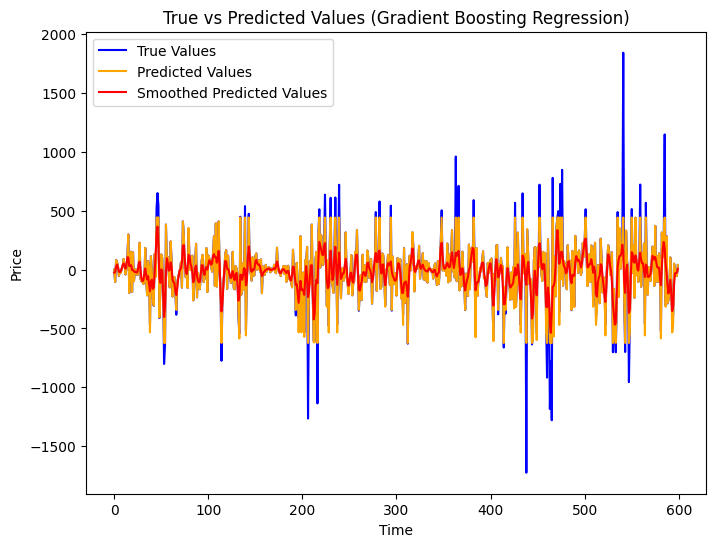

Best Parameters: {'alpha': 0.9, 'learning_rate': 0.05, 'max_depth': 6, 'min_samples_leaf': 6, 'min_samples_split': 6, 'n_estimators': 300, 'subsample': 1.0}
Future Prediction: [-0.0756207]
Last Price: 57669.8
Elapsed Time (seconds): 113.1810154914856


In [3]:
# Start timer to measure how long it will take the code to run
start_time = time.time()
#Define the size of the training data in order to avoid data leakage when scaling
train_size = 2400

# Function to process features
def process_feature(feature, train_size):
    feature_array = np.array(df[[feature]])
    feature_array = feature_array.reshape(-1, 1)
    feature_scaler = StandardScaler()
    feature_scaler.fit(feature_array[:train_size])
    feature_scaled_train = feature_scaler.transform(feature_array[:train_size])
    feature_scaled_test = feature_scaler.transform(feature_array[train_size:])
    return feature_scaled_train, feature_scaled_test, feature_scaler
# List of features
features = ['PD', 'PU','Quantum_Kernel', 'Quantum_HO', 'Quantum_Regression', 'Gravitational_Pull']
# Process each feature concurrently
with ThreadPoolExecutor(max_workers=8) as executor:
    results = list(executor.map(lambda f: process_feature(f, train_size), features))
    feature_scaled_train_list = [res[0] for res in results]
    feature_scaled_test_list = [res[1] for res in results]
    feature_scalers = [res[2] for res in results]
# Convert and scale the target variable with respect to the training size
price = np.array(df[['Diff']])
price = price.reshape(-1, 1)
price_scaler = StandardScaler()
price_scaler.fit(price[:train_size])
price_scaled_train = price_scaler.transform(price[:train_size])
price_scaled_test = price_scaler.transform(price[train_size:])
# Concatenate feature arrays
x_train_list = [price_scaled_train] + feature_scaled_train_list
x_test_list = [price_scaled_test] + feature_scaled_test_list
x_train = np.concatenate(x_train_list, axis=1)
x_test = np.concatenate(x_test_list, axis=1)
# Define training and testing data
train_data = pd.DataFrame(x_train, columns=['Price'] + features)
train_data['Target'] = price_scaled_train.flatten()
x_train = train_data[features].values
y_train = train_data['Target'].values
test_data = pd.DataFrame(x_test, columns=['Price'] + features)
test_data['Target'] = price_scaled_test.flatten()
x_test = test_data[features].values
y_test = test_data['Target'].values
# Outlier Detection and Removal
iso = IsolationForest(contamination=0.2)
yhat = iso.fit_predict(x_train)
mask = yhat != -1
x_train, y_train = x_train[mask, :], y_train[mask]
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 300],
    'learning_rate': [0.01, 0.05],
    'max_depth': [6, 8, 12, 24, 36, 48],
    'alpha': [0.9],
    'min_samples_split': [6,12],
    'min_samples_leaf': [6,12],
    'subsample': [1.0]
}

# Use GridSearch Cross-Validation for model tuning
gbr = GradientBoostingRegressor(random_state=0)
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=5, n_jobs=-1)
#Fit the Gradient Boost Regression model
grid_search.fit(x_train, y_train)
# Extract what the best parameters were
best_params = grid_search.best_params_
# Train final model with best parameters and Huber loss
best_gbr = GradientBoostingRegressor(**best_params, loss='huber', random_state=0)
best_gbr.fit(x_train, y_train)
# Generate the model predictions
y_pred = best_gbr.predict(x_test)
# Inverse transform the predictions and true values
y_test = price_scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
y_pred = price_scaler.inverse_transform(y_pred.reshape(-1, 1)).flatten()
# Print the feature importances
feature_importances = best_gbr.feature_importances_
print("Feature Importances:")
for feature, importance in zip(features, feature_importances):
    print(f"{feature}: {importance}")
# Permutation feature importance
perm_importance = permutation_importance(best_gbr, x_test, y_test, n_repeats=10, random_state=0)
print("Permutation Feature Importances:")
for feature, importance in zip(features, perm_importance.importances_mean):
    print(f"{feature}: {importance}")
# Apply a Gaussian smoothing filter with a standard deviation of 1
y_pred_smoothed = gaussian_filter1d(y_pred, sigma=1)
# Plot the results of model performance
plt.figure(figsize=(8, 6))
plt.plot(y_test, color='blue', label='True Values')
plt.plot(y_pred, color='orange', label='Predicted Values')
plt.plot(y_pred_smoothed, color='red', label='Smoothed Predicted Values')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.title('True vs Predicted Values (Gradient Boosting Regression)')
plt.show()
# Print what the best model parameters were and what the future prediction is
print("Best Parameters:", best_params)
print("Future Prediction:", y_test[-1:] - y_pred[-1:])
print("Last Price:", df['Close'].values[-1])
# Measure the elapsed time required for the entire code to run up until this point
end_time = time.time()
elapsed_time = end_time - start_time
print("Elapsed Time (seconds):", elapsed_time)

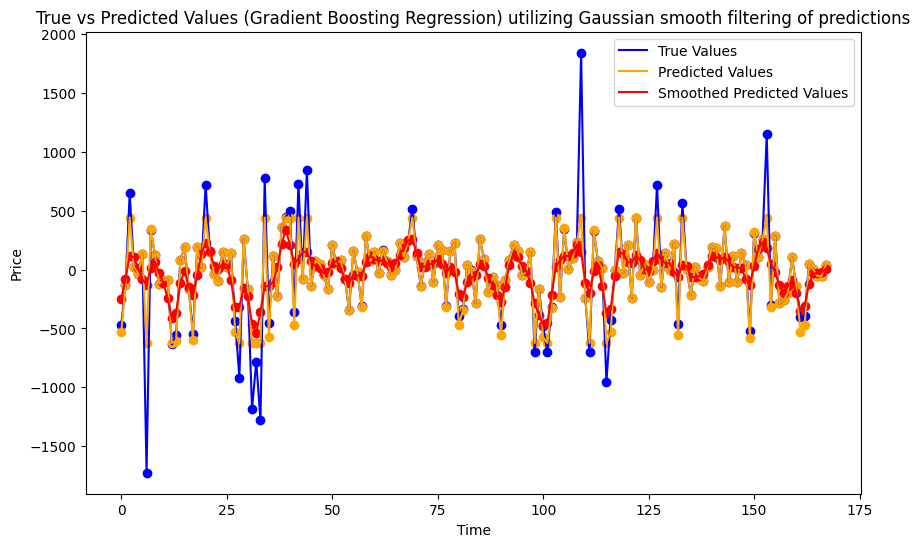

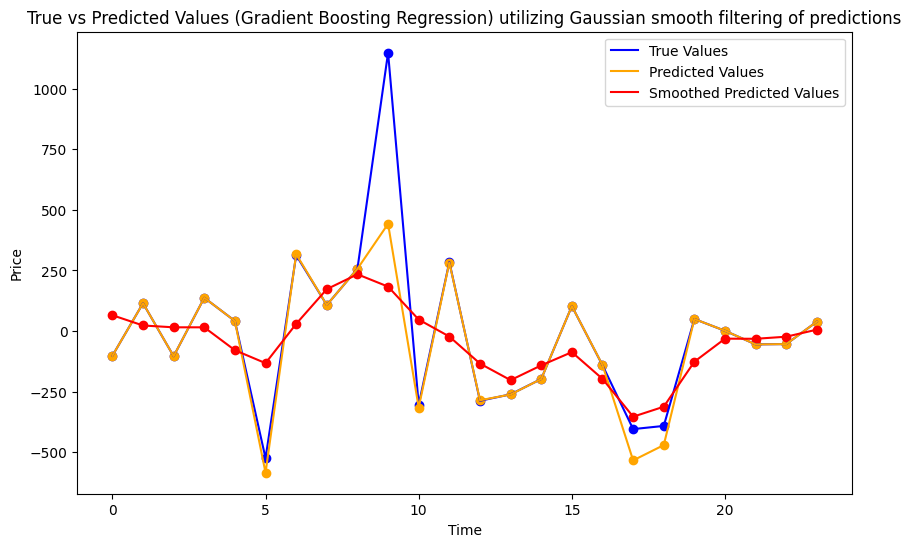

In [4]:
# Calculate the Gaussian moving average of the predictions with a sigma of 1
gaussian_smoothed = gaussian_filter1d(y_pred, sigma=1)
# Plot the results for the last week of hourly data
plt.figure(figsize=(10, 6))
plt.plot(y_test[-168:], label='True Values', color='blue')
plt.plot(y_pred[-168:], label='Predicted Values', color='orange')
plt.plot(gaussian_smoothed[-168:], label='Smoothed Predicted Values', color='red')  # Add smoothed line
# Add dots at each point for true values and predicted values
plt.scatter(np.arange(len(y_test[-168:])), y_test[-168:], color='blue')
plt.scatter(np.arange(len(y_pred[-168:])), y_pred[-168:], color='orange')
plt.scatter(np.arange(len(gaussian_smoothed[-168:])), gaussian_smoothed[-168:], color='red')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('True vs Predicted Values (Gradient Boosting Regression) utilizing Gaussian smooth filtering of predictions')
plt.legend()
plt.show()
# Plot the results for the last 2 days (24 hours)
plt.figure(figsize=(10, 6))
plt.plot(y_test[-24:], label='True Values', color='blue')
plt.plot(y_pred[-24:], label='Predicted Values', color='orange')
plt.plot(gaussian_smoothed[-24:], label='Smoothed Predicted Values', color='red')  # Add smoothed line

# Add dots at each point for true values and predicted values
plt.scatter(np.arange(len(y_test[-24:])), y_test[-24:], color='blue')
plt.scatter(np.arange(len(y_pred[-24:])), y_pred[-24:], color='orange')
plt.scatter(np.arange(len(gaussian_smoothed[-24:])), gaussian_smoothed[-24:], color='red')

plt.xlabel('Time')
plt.ylabel('Price')
plt.title('True vs Predicted Values (Gradient Boosting Regression) utilizing Gaussian smooth filtering of predictions')
plt.legend()
plt.show()

In [5]:
# Calculate the residuals
residuals = y_test - y_pred

# Square the fitted values
fitted_values_squared = np.square(y_pred)

# Regress the residuals on the squared fitted values
white_model = sm.OLS(np.square(residuals), sm.add_constant(fitted_values_squared))
white_results = white_model.fit()

# Extract the coefficient of determination (R-squared) from the White's test regression
white_r_squared = white_results.rsquared
# Print the resulting white test score
print("White's Test for Heteroskedasticity (R-squared):", white_r_squared)

White's Test for Heteroskedasticity (R-squared): 0.07021914420474507


6.513054147185245


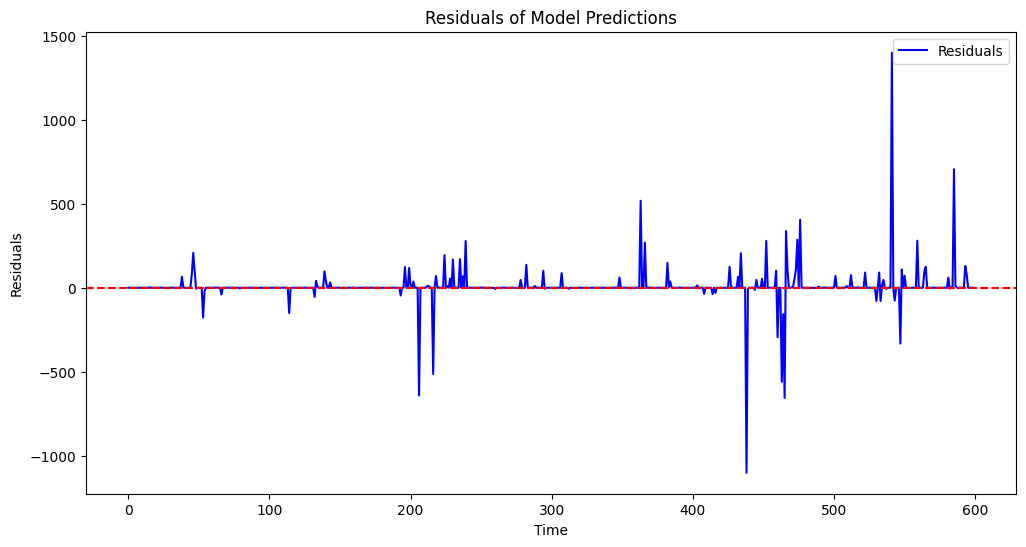

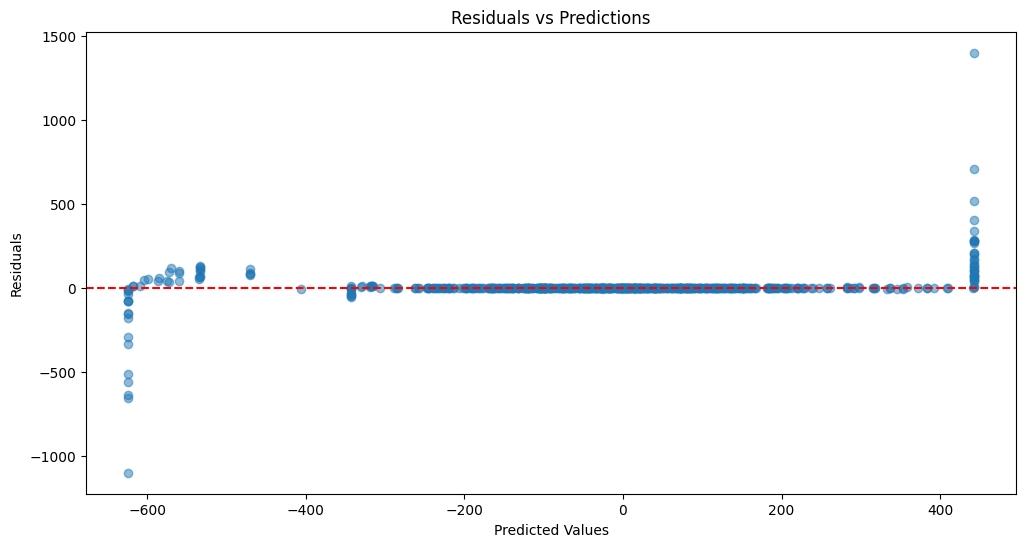

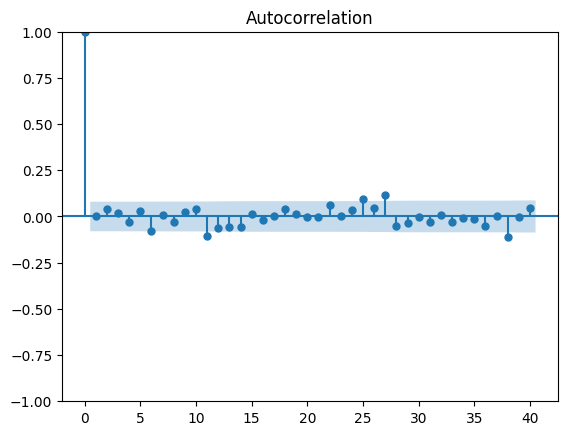

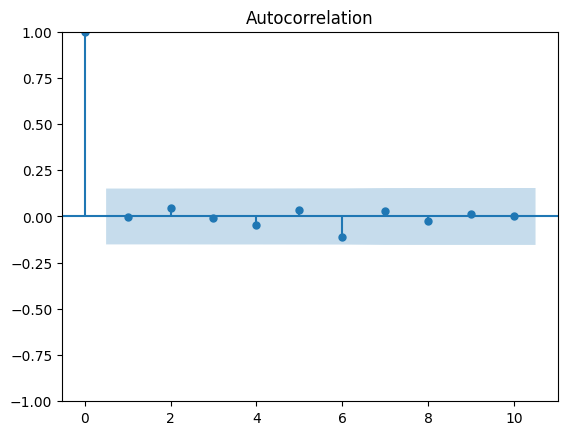

In [6]:
#Standardized calculation of the residuals
residuals = y_test - y_pred
mean_r = residuals.mean()
print(mean_r)
# Plot all the standardized residuals
plt.figure(figsize=(12, 6))
plt.plot(residuals, label='Residuals', color='blue')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals of Model Predictions')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.legend()
plt.show()
# Plotting residuals for heteroscedasticity
plt.figure(figsize=(12, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Predictions')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()
# If heteroscedasticity is present then the variance of the residuals will increase with predicted values.
sm.graphics.tsa.plot_acf(residuals, lags=40, alpha=0.05)
plt.show()
# Check for autocorrelation in residuals with a lag setting of 7 and regularization of 50%
sm.graphics.tsa.plot_acf(residuals[-168:], lags=10, alpha=0.05)
plt.show()

In [7]:
# Function to calculate drawdown events
def calculate_drawdown_events(y_test, y_pred):
    drawdown_events = 0
    for i in range(len(y_test) - 1):
        if y_pred[i] > y_test[i] and y_test[i + 1] < y_test[i]:
            drawdown_events += 1
    return drawdown_events
# Calculate drawdown events
drawdown_events = calculate_drawdown_events(y_test, y_pred)
print(f"Number of drawdown events: {drawdown_events}")
print(len(residuals))

Number of drawdown events: 139
600


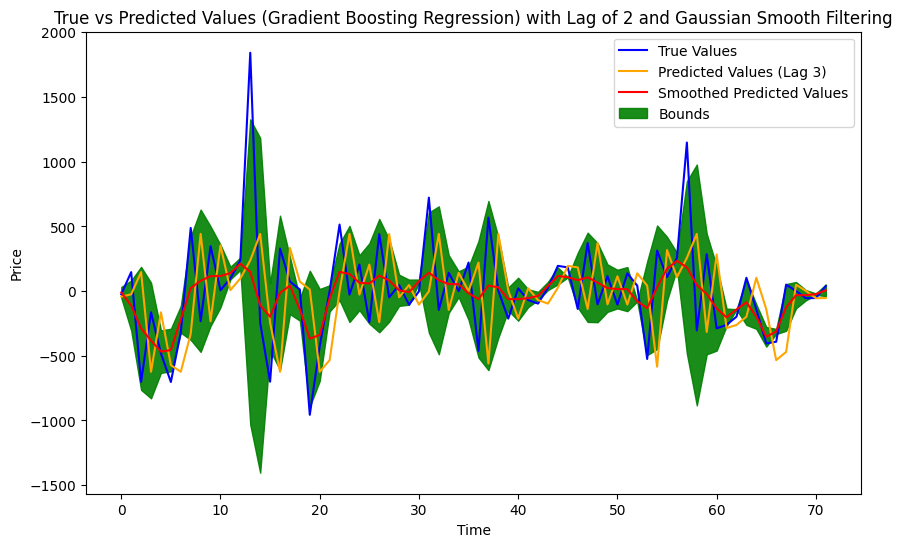

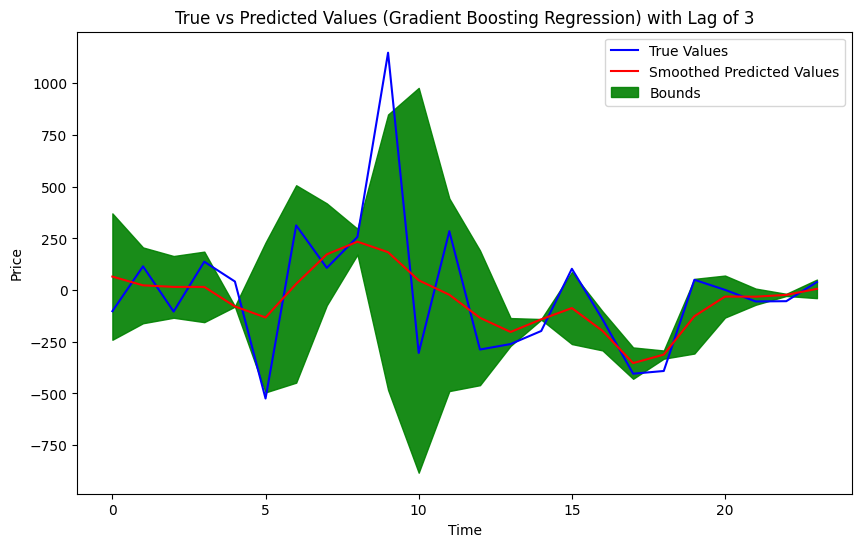

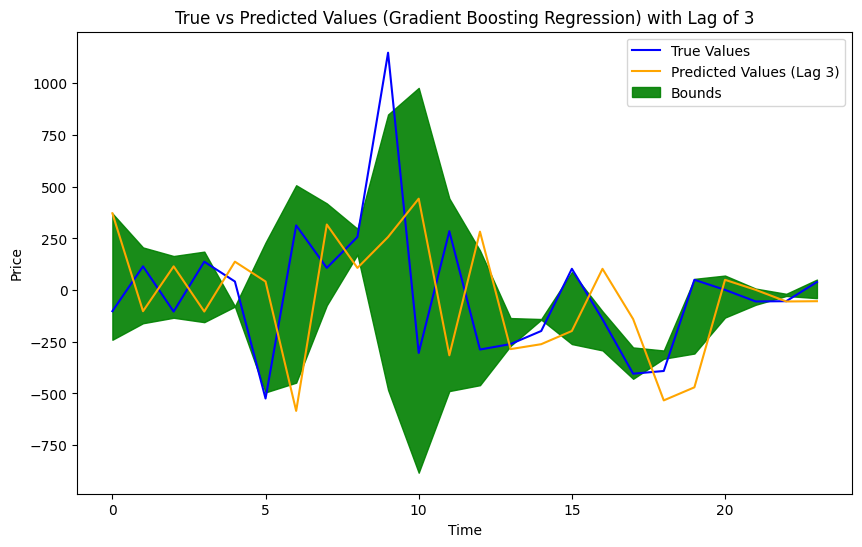

Last Closing Price: 2999    57669.8
Name: Close, dtype: float64
Last Closing Price derivative: [38.96796875]
Future Lagged Prediction: [-53.8197489]
Future Current Prediction: [39.04358945]
Future Prediction Gaussian: [5.88592543]


In [8]:
# Apply a lag of 4 to the model predictions
y_pred_lag = np.roll(y_pred, 1)
# Calculate the Gaussian moving average of the predictions with a sigma of 2
gaussian_smoothed = gaussian_filter1d(y_pred, sigma=1)
# Calculate the residuals between the true values and the Gaussian smoothed predictions
residuals = y_test - gaussian_smoothed
# Defining the size of the rolling window for calculating local standard deviation
window_size = 2
# Calculating the standard deviation of the residuals within the rolling window
rolling_std = pd.Series(residuals).rolling(window=window_size, min_periods=1).std()
# Calculating the upper and lower bounds based on the rolling standard deviation for the residuals
upper_bound = gaussian_smoothed + rolling_std
lower_bound = gaussian_smoothed - rolling_std
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(y_test[-72:], label='True Values', color='blue')
plt.plot(y_pred_lag[-72:], label='Predicted Values (Lag 3)', color='orange')
plt.plot(gaussian_smoothed[-72:], label='Smoothed Predicted Values', color='red')
plt.fill_between(range(len(gaussian_smoothed[-72:])), lower_bound[-72:], upper_bound[-72:], color='green', alpha=0.9, label='Bounds')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('True vs Predicted Values (Gradient Boosting Regression) with Lag of 2 and Gaussian Smooth Filtering')
plt.legend()
plt.show()
# Same plot but without Gaussian smoothing for an easier base visualization
plt.figure(figsize=(10, 6))
plt.plot(y_test[-24:], label='True Values', color='blue')
plt.plot(gaussian_smoothed[-24:], label='Smoothed Predicted Values', color='red')
plt.fill_between(range(len(gaussian_smoothed[-24:])), lower_bound[-24:], upper_bound[-24:], color='green', alpha=0.9, label='Bounds')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('True vs Predicted Values (Gradient Boosting Regression) with Lag of 3')
plt.legend()
plt.show()
# Same plot but without Gaussian smoothing for an easier base visualization
plt.figure(figsize=(10, 6))
plt.plot(y_test[-24:], label='True Values', color='blue')
plt.plot(y_pred_lag[-24:], label='Predicted Values (Lag 3)', color='orange')
plt.fill_between(range(len(gaussian_smoothed[-24:])), lower_bound[-24:], upper_bound[-24:], color='green', alpha=0.9, label='Bounds')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('True vs Predicted Values (Gradient Boosting Regression) with Lag of 3')
plt.legend()
plt.show()
print("Last Closing Price:", df['Close'][-1:])
print("Last Closing Price derivative:", y_test[-1:])
print("Future Lagged Prediction:", y_pred_lag[-1:])
print("Future Current Prediction:", y_pred[-1:])
print("Future Prediction Gaussian:", gaussian_smoothed[-1:])

In [22]:
# Save the trained model
joblib.dump(best_gbr, 'gradient_boosting_model.pkl')

['gradient_boosting_model.pkl']

In [21]:
# Define main function
def main_function_input(file_path):
    # Load the CSV file into a DataFrame
    df = pd.read_csv(file_path)

    # Function to calculate Gaussian Probability Density Function
    def gaussian_pdf(x, mean, std_dev):
        coefficient = 1 / (std_dev * math.sqrt(2 * math.pi))
        exponent = -((x - mean) ** 2) / (2 * std_dev ** 2)
        return coefficient * math.exp(exponent)

    # Define the derivative (slope) of the Gaussian function
    def gaussian_slope(x, mean, std_dev):
        A = 1 / (std_dev * math.sqrt(2 * math.pi))
        alpha = 1 / (2 * std_dev ** 2)
        return -2 * alpha * A * (x - mean) * math.exp(-alpha * (x - mean) ** 2)

    # Quantum Kernel function structure based on squared overlap
    def quantum_kernel(x1, x2):
        return np.abs(np.dot(x1, x2.T)) ** 2

    # Quantum Harmonic Oscillator wavefunction for the ground state (Gaussian function)
    def quantum_harmonic_oscillator(x, m=1, ω=1, ħ=1):
        norm_const = (m * ω / (np.pi * ħ)) ** 0.25
        return norm_const * np.exp(-m * ω * x ** 2 / (2 * ħ))
    # Function to calculate the expectation value
    def linear_quantum_regression(x):
        return np.sum(x * O_hat)
    #drop all NaN
    df = df.dropna(axis=0)
#Calculate the derivatives of the Closing prices
    df['Diff'] = df['M'].diff()
    df['Diff(dt)'] = df['Diff'].diff()
#Calculate the percentage changes of the Closing prices
    df['Change'] = df['M'].pct_change() * 99
#Calculate the derivatives of the percentages of the Closing prices
    df['ChangeDiff'] = df['Change'].pct_change() * 99
#Calculate the min and max of the percentage changes of the Closing prices
    min_C = df['Change'].min()
    max_C = df['Change'].max()
    df['Gaussian_Change'] = (df['Change'] - min_C) / (max_C - min_C)
#Calculate the average of the Closing derivatives
    mean_close = df['Diff'].mean()
#Calculate te standard deviation of the Closing derivatives
    std_dev_close = df['Diff'].std()
#Calculate the standard Gaussian probability density function and fit it to the Closing price derivatives
    df['Gaussian_PDF'] = df['Diff'].apply(lambda x: gaussian_pdf(x, mean_close, std_dev_close))
#Retrieve the minimum and maximum values of the probabilities 
    min_pdf = df['Gaussian_PDF'].min()
    max_pdf = df['Gaussian_PDF'].max()
#Normalize the Gaussian probability density function based upon Gaussian normalization of the min/max probabilities
    df['Gaussian_PDF_Normalized'] = (df['Gaussian_PDF'] - min_pdf) / (max_pdf - min_pdf)
#Map the normalized values to the range of 0-99% for upward and downward movement probability
    df['PU'] = (1 * df['Gaussian_PDF_Normalized'])
    df['PD'] = (1 - df['Gaussian_PDF_Normalized'])
#Calculate the derivatives of the upward and downward Gaussian probability densities
    df['PU(dt)'] = df['PU'].diff()
    df['PD(dt)'] = df['PD'].diff()
# Creating the Quantum square-overlap Kernel Column using the derivatives of the probability densitites, Gaussian slope and percentage change derivatives
    X = df[['Gaussian_Change']].to_numpy()
    n_samples = X.shape[0]
    quantum_kernel_values = []
    for i in range(n_samples):
        kernel_value = quantum_kernel(X[i], X[i])
        quantum_kernel_values.append(kernel_value)
#Multiplying the Quantum square-overlap Kernel with the percentage change of the Closing prices    
    df['Quantum_Kernel'] = quantum_kernel_values
# Create Quantum Harmonic Oscillator column using Gaussian Change as its feature
    df['Quantum_HO'] = df['Gaussian_Change'].apply(lambda x: quantum_harmonic_oscillator(x))
# Calculate kurtosis for Gaussian_Change
    kurtosis_gaussian_change = df['Gaussian_Change'].kurtosis()
# Using the modified Einstein field equation to calculate gravitational pull
    df['Gravitational_Pull'] = (8 * np.pi * 6.67430e-11 / 299792458 ** 4) * kurtosis_gaussian_change * df['Gaussian_Change']
# Define the density matrices and Hermitian operator based on features
    rho_i = df[['Change', 'Gaussian_Change']].to_numpy()
    O_hat = np.random.rand(rho_i.shape[1])  # Example Hermitian operator coefficients    
# Add the regression calculation as a new column
    df['Quantum_Regression'] = df.apply(lambda row: linear_quantum_regression(row[['Gaussian_Change']].to_numpy()), axis=1)
    # Take only the last 6000 rows of data
    df = df.tail(3000)

    # Reset the index count
    df = df.dropna(axis=0)
    df = df.reset_index(drop=True)

    return df

# Path to the CSV file
file_path = r"C:\Users\daddy\Downloads\dielectron.csv\dielectron.csv"

# Calling the main function
if __name__ == "__main__":
    df = main_function_input(file_path)
df

,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,...,Gaussian_PDF,Gaussian_PDF_Normalized,PU,PD,PU(dt),PD(dt),Quantum_Kernel,Quantum_HO,Gravitational_Pull,Quantum_Regression
0,146511,447132758,7.75362,4.630920,-6.044360,1.46252,7.61444,0.190910,-0.917035,-1,...,0.010904,0.964790,0.964790,0.035210,-0.034057,0.034057,1.391681e-06,0.750683,2.342848e-43,0.066680
1,146511,535070081,7.82871,1.411420,-1.318450,-7.58672,1.93143,-2.077110,-0.751356,1,...,0.010553,0.933451,0.933451,0.066549,-0.031339,0.031339,3.321604e-09,0.751104,5.178408e-44,0.014738
2,146511,535101646,94.16390,11.870000,17.337700,-91.78970,21.01170,-2.180420,0.970457,1,...,0.009396,0.829949,0.829949,0.170051,-0.103502,0.103502,2.078812e-05,0.749415,4.605885e-43,0.131089
3,146511,534869304,23.15100,8.927050,-8.532400,19.58250,12.34890,1.241420,-0.762798,-1,...,0.008152,0.718695,0.718695,0.281305,-0.111253,0.111253,2.094782e-06,0.750582,2.595039e-43,0.073858
4,146511,534942422,50.31500,-34.855300,29.799300,-20.70530,45.85730,-0.437432,2.434240,1,...,0.007493,0.659777,0.659777,0.340223,-0.058919,0.058919,8.273633e-07,0.750784,2.057232e-43,0.058551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,146511,522575834,12.31310,-10.658000,5.164440,3.36858,11.84330,0.280727,2.690370,-1,...,0.000573,0.040837,0.040837,0.959163,-0.001511,0.001511,3.642149e-12,0.751125,9.423206e-45,0.002682
2996,146511,522786431,18.46420,7.854990,15.133000,-7.08659,17.05020,-0.404510,1.092010,1,...,0.010636,0.940836,0.940836,0.059164,0.899999,-0.899999,5.357473e-06,0.750257,3.281703e-43,0.093401
2997,146511,522906124,4.18566,-3.273500,-0.308507,-2.59013,3.28801,-0.723075,-3.047630,1,...,0.011011,0.974388,0.974388,0.025612,0.033552,-0.033552,1.908593e-08,0.751074,8.017475e-44,0.022819
2998,146511,523243830,54.46220,11.352600,11.880900,51.92400,16.43280,1.867800,0.808132,-1,...,0.011010,0.974294,0.974294,0.025706,-0.000094,0.000094,2.296631e-09,0.751108,4.722066e-44,0.013440


Feature Importances:
PD: 0.18628416287848693
PU: 0.09843074383953782
Quantum_Kernel: 0.13118359359948412
Quantum_HO: 0.3530208987778941
Gravitational_Pull: 0.12309625848840858
Quantum_Regression: 0.10798434241618857


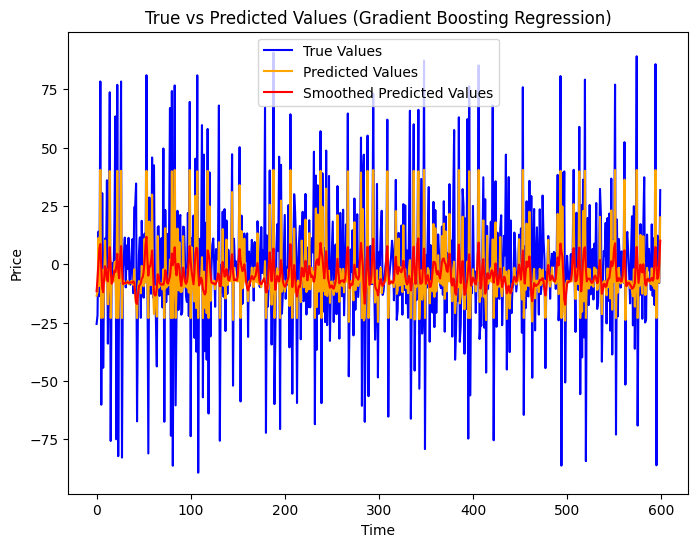

Future Mass Prediction: [20.13172027]
Last Mass: 2999    36.5043
Name: M, dtype: float64
Elapsed Time (seconds): 0.3320791721343994


In [23]:
# Load the trained model
loaded_model = joblib.load('gradient_boosting_model.pkl')
# Start timer
start_time = time.time()

train_size = 2400

# Function to process features
def process_feature(feature, train_size):
    feature_array = np.array(df[[feature]])
    feature_array = feature_array.reshape(-1, 1)
    feature_scaler = StandardScaler()
    feature_scaler.fit(feature_array[:train_size])
    feature_scaled_train = feature_scaler.transform(feature_array[:train_size])
    feature_scaled_test = feature_scaler.transform(feature_array[train_size:])
    return feature_scaled_train, feature_scaled_test, feature_scaler

# List of features
features = ['PD', 'PU','Quantum_Kernel', 'Quantum_HO', 'Gravitational_Pull', 'Quantum_Regression']

# Process each feature concurrently
with ThreadPoolExecutor(max_workers=8) as executor:
    results = list(executor.map(lambda f: process_feature(f, train_size), features))
    feature_scaled_train_list = [res[0] for res in results]
    feature_scaled_test_list = [res[1] for res in results]
    feature_scalers = [res[2] for res in results]

    # Convert and scale the target variable
    price = np.array(df['Diff'])
    price = price.reshape(-1, 1)
    price_scaler = StandardScaler()
    price_scaler.fit(price[:train_size])
    price_scaled_train = price_scaler.transform(price[:train_size])
    price_scaled_test = price_scaler.transform(price[train_size:])
    
    # Concatenate feature arrays
    x_train_list = [price_scaled_train] + feature_scaled_train_list
    x_test_list = [price_scaled_test] + feature_scaled_test_list
    
    x_train = np.concatenate(x_train_list, axis=1)
    x_test = np.concatenate(x_test_list, axis=1)
    
    # Define training and testing data
    train_data = pd.DataFrame(x_train, columns=['Price'] + features)
    train_data['Target'] = price_scaled_train.flatten()
    x_train = train_data[features].values
    y_train = train_data['Target'].values
    
    test_data = pd.DataFrame(x_test, columns=['Price'] + features)
    test_data['Target'] = price_scaled_test.flatten()
    x_test = test_data[features].values
    y_test = test_data['Target'].values
    
    # Outlier Detection and Removal
    from sklearn.ensemble import IsolationForest
    iso = IsolationForest(contamination=0.4)
    yhat = iso.fit_predict(x_train)
    mask = yhat != -1
    x_train, y_train = x_train[mask, :], y_train[mask]
        
    # Use the loaded model for predictions
    y_pred = loaded_model.predict(x_test)
    
    # Inverse transform the predictions and true values for comparison in original scale
    y_test = price_scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
    y_pred = price_scaler.inverse_transform(y_pred.reshape(-1, 1)).flatten()
    # Print feature importances from the loaded model
    feature_importances = loaded_model.feature_importances_
    print("Feature Importances:")
    for feature, importance in zip(features, feature_importances):
        print(f"{feature}: {importance}")
    # Apply a Gaussian filter to smooth predictions with a pre-defined sigma
    y_pred_smoothed = gaussian_filter1d(y_pred, sigma=1)
    
    # Plot the results
    plt.figure(figsize=(8, 6))
    plt.plot(y_test, color='blue', label='True Values')
    plt.plot(y_pred, color='orange', label='Predicted Values')
    plt.plot(y_pred_smoothed, color='red', label='Smoothed Predicted Values')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend()
    plt.title('True vs Predicted Values (Gradient Boosting Regression)')
    plt.show()
    
    # Print what our future price target is
    print("Future Mass Prediction:", y_pred[-1:])
    print("Last Mass:", df['M'][-1:])
# Measure the time taken to run the code
end_time = time.time()
elapsed_time = end_time - start_time
print("Elapsed Time (seconds):", elapsed_time)

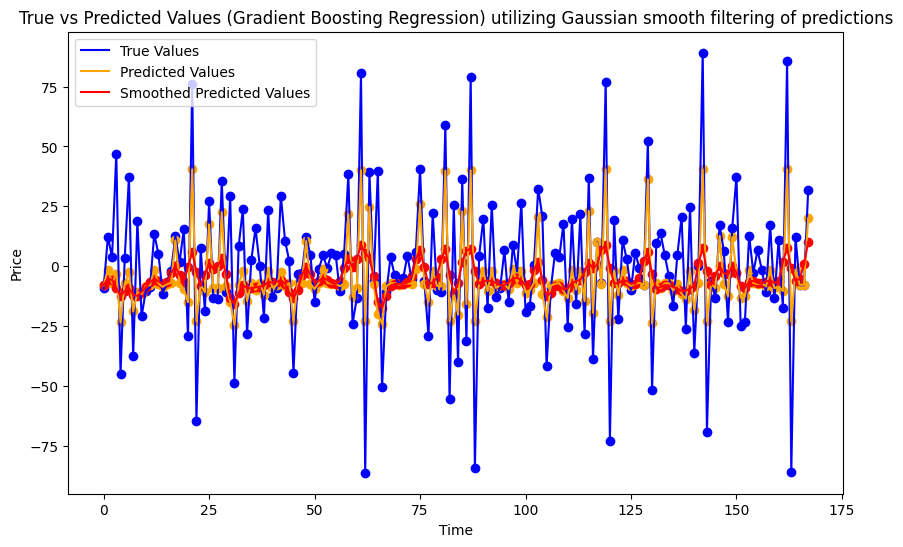

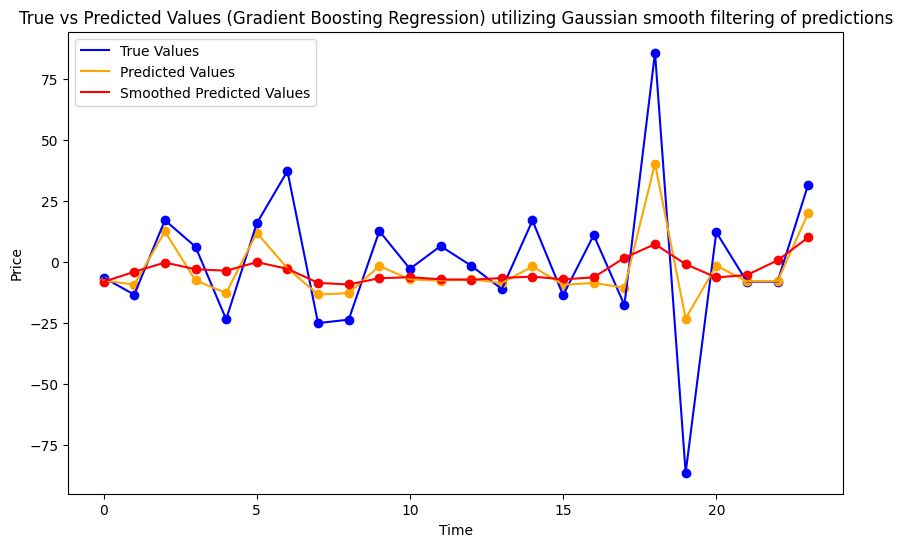

In [24]:
# Calculate the Gaussian moving average of the predictions with a sigma of 1
gaussian_smoothed = gaussian_filter1d(y_pred, sigma=1)
# Plot the results for the last week of hourly data
plt.figure(figsize=(10, 6))
plt.plot(y_test[-168:], label='True Values', color='blue')
plt.plot(y_pred[-168:], label='Predicted Values', color='orange')
plt.plot(gaussian_smoothed[-168:], label='Smoothed Predicted Values', color='red')  # Add smoothed line
# Add dots at each point for true values and predicted values
plt.scatter(np.arange(len(y_test[-168:])), y_test[-168:], color='blue')
plt.scatter(np.arange(len(y_pred[-168:])), y_pred[-168:], color='orange')
plt.scatter(np.arange(len(gaussian_smoothed[-168:])), gaussian_smoothed[-168:], color='red')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('True vs Predicted Values (Gradient Boosting Regression) utilizing Gaussian smooth filtering of predictions')
plt.legend()
plt.show()
# Plot the results for the last 2 days (24 hours)
plt.figure(figsize=(10, 6))
plt.plot(y_test[-24:], label='True Values', color='blue')
plt.plot(y_pred[-24:], label='Predicted Values', color='orange')
plt.plot(gaussian_smoothed[-24:], label='Smoothed Predicted Values', color='red')  # Add smoothed line

# Add dots at each point for true values and predicted values
plt.scatter(np.arange(len(y_test[-24:])), y_test[-24:], color='blue')
plt.scatter(np.arange(len(y_pred[-24:])), y_pred[-24:], color='orange')
plt.scatter(np.arange(len(gaussian_smoothed[-24:])), gaussian_smoothed[-24:], color='red')

plt.xlabel('Time')
plt.ylabel('Price')
plt.title('True vs Predicted Values (Gradient Boosting Regression) utilizing Gaussian smooth filtering of predictions')
plt.legend()
plt.show()